Import necessary libraries


In [25]:
import pandas as pd

# Load the train and test datasets

In [26]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

Display the first few rows of the training data

In [27]:
train_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


Get basic information about the training data

In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


 Get basic information about the test data

In [29]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


Get the shape of the training and test data

In [30]:
print(f'Training data shape: {train_data.shape}')
print(f'Test data shape: {test_data.shape}')

Training data shape: (4209, 378)
Test data shape: (4209, 377)


Check for missing values in the training data

In [31]:
print("Missing values in training data:")
print(train_data.isnull().sum())

Missing values in training data:
ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64


Check for missing values in the test data

In [32]:
print("\nMissing values in test data:")
print(test_data.isnull().sum())


Missing values in test data:
ID      0
X0      0
X1      0
X2      0
X3      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 377, dtype: int64


In [33]:
# Perform one-hot encoding on categorical columns in the training data
train_data_encoded = pd.get_dummies(train_data)

In [34]:
# Perform one-hot encoding on categorical columns in the test data
test_data_encoded = pd.get_dummies(test_data)

In [35]:
# Display the shape of the datasets after encoding
print(f"Training data after encoding shape: {train_data_encoded.shape}")
print(f"Test data after encoding shape: {test_data_encoded.shape}")

Training data after encoding shape: (4209, 565)
Test data after encoding shape: (4209, 570)


In [36]:
# Align the training and test sets by adding missing columns
train_data_encoded, test_data_encoded = train_data_encoded.align(test_data_encoded, join='left', axis=1)

In [37]:
# Display the new shape of the datasets after alignment
print(f"Training data after alignment shape: {train_data_encoded.shape}")
print(f"Test data after alignment shape: {test_data_encoded.shape}")

Training data after alignment shape: (4209, 565)
Test data after alignment shape: (4209, 565)


Importing libraries for training the model

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [39]:
# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [40]:
# Make predictions on the validation set
y_val_pred = rf_model.predict(X_val)


In [41]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_val, y_val_pred)
print(f"Mean Squared Error on validation set: {mse}")


Mean Squared Error on validation set: 79.51986068165077


Evaluate the model using additional metrics

In [42]:
from sklearn.metrics import r2_score, mean_absolute_error

# Calculate R-squared
r2 = r2_score(y_val, y_val_pred)
print(f"R-squared on validation set: {r2}")

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_val, y_val_pred)
print(f"Mean Absolute Error on validation set: {mae}")


R-squared on validation set: 0.48911088007301096
Mean Absolute Error on validation set: 5.91745023752969


using the Gradient Boosting Regressor model and see how it performs on the same data.

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred_gb = gb_model.predict(X_val)

# Calculate the Mean Squared Error
mse_gb = mean_squared_error(y_val, y_val_pred_gb)
print(f"Mean Squared Error on validation set with Gradient Boosting: {mse_gb}")

# Calculate R-squared
r2_gb = r2_score(y_val, y_val_pred_gb)
print(f"R-squared on validation set with Gradient Boosting: {r2_gb}")

# Calculate Mean Absolute Error
mae_gb = mean_absolute_error(y_val, y_val_pred_gb)
print(f"Mean Absolute Error on validation set with Gradient Boosting: {mae_gb}")


Mean Squared Error on validation set with Gradient Boosting: 68.04474080004934
R-squared on validation set with Gradient Boosting: 0.5628347755516261
Mean Absolute Error on validation set with Gradient Boosting: 5.3466645258244085


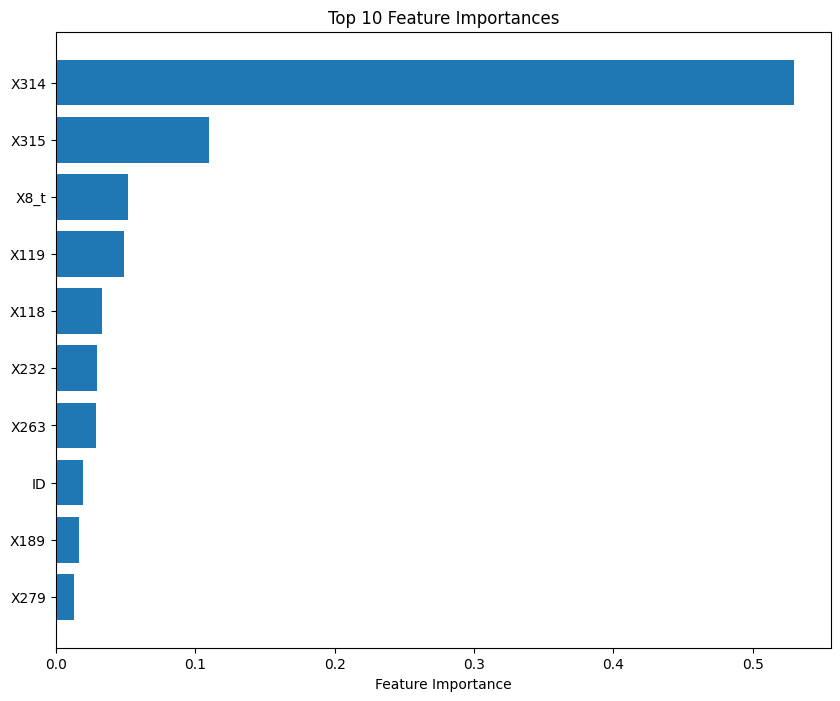

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the gradient boosting model
feature_importances = gb_model.feature_importances_

# Create a sorted index of feature importances
sorted_idx = np.argsort(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx[-10:])), feature_importances[sorted_idx][-10:], align='center')
plt.yticks(range(len(sorted_idx[-10:])), np.array(X.columns)[sorted_idx][-10:])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances')
plt.show()


In [45]:
# Select top 5 features
top_features = ['X314', 'X315', 'X8_t', 'X119', 'X118']  # Adjust based on your plot

# Subset the data to only these top features
X_train_top = X_train[top_features]
X_val_top = X_val[top_features]

# Retrain the RandomForest model using the top features
rf_model_top = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_top.fit(X_train_top, y_train)

# Make predictions and evaluate the model
y_val_pred_top = rf_model_top.predict(X_val_top)

# Calculate new Mean Squared Error and R-squared
mse_top = mean_squared_error(y_val, y_val_pred_top)
r2_top = r2_score(y_val, y_val_pred_top)
print(f"Mean Squared Error on validation set with top features: {mse_top}")
print(f"R-squared on validation set with top features: {r2_top}")


Mean Squared Error on validation set with top features: 70.83687543080143
R-squared on validation set with top features: 0.544896222943576


 Import RandomizedSearchCV

In [47]:
from sklearn.model_selection import RandomizedSearchCV


Use RandomizedSearchCV

In [48]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],
}

# Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, 
                                   param_distributions=param_grid, 
                                   n_iter=10,  # Number of parameter settings sampled
                                   cv=3, 
                                   verbose=2, 
                                   n_jobs=-1,
                                   random_state=42)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Output the best parameters
print("Best Hyperparameters: ", random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=  17.9s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=  18.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   8.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   8.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=  18.6s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   8.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  19.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  20.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   6.5s
[CV] END max_depth=20, mi

retraining the model using the best hyperparameters.

In [49]:
# Retrain RandomForest model using the best hyperparameters
best_rf_model = RandomForestRegressor(n_estimators=200, 
                                      min_samples_split=10, 
                                      min_samples_leaf=2, 
                                      max_depth=10, 
                                      random_state=42)

# Train the model on the training set
best_rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred_best = best_rf_model.predict(X_val)

# Calculate new Mean Squared Error and R-squared with the best model
mse_best = mean_squared_error(y_val, y_val_pred_best)
r2_best = r2_score(y_val, y_val_pred_best)

print(f"Mean Squared Error with Best Model: {mse_best}")
print(f"R-squared with Best Model: {r2_best}")


Mean Squared Error with Best Model: 65.20232002342706
R-squared with Best Model: 0.5810964002147314
